In [44]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import shap

In [5]:
usd_rate = pd.read_excel('c:/Users/Serge/Downloads/cbr_2017_2020.xlsx')
brent_oil = pd.read_excel('c:/Users/Serge/Downloads/brent.xls', sheet_name=1, names=['date', 'oil_price'], skiprows=2)

In [6]:
usd_rate.columns

Index(['nominal', 'data', 'curs', 'cdx'], dtype='object')

In [7]:
brent_oil.columns

Index(['date', 'oil_price'], dtype='object')

<AxesSubplot:>

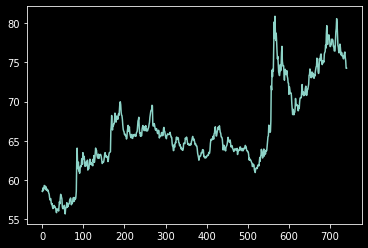

In [8]:
usd_rate.curs.plot()

<AxesSubplot:>

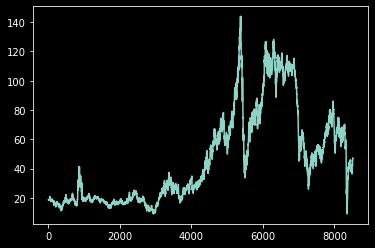

In [9]:
brent_oil.oil_price.plot()

In [10]:
brent_oil

,date,oil_price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8509,2020-11-24,46.63
8510,2020-11-25,47.30
8511,2020-11-26,46.32
8512,2020-11-27,46.88


In [11]:
usd_rate.data

0     2017-12-01
1     2017-12-02
2     2017-12-05
3     2017-12-06
4     2017-12-07
         ...    
736   2020-12-02
737   2020-12-03
738   2020-12-04
739   2020-12-05
740   2020-12-08
Name: data, Length: 741, dtype: datetime64[ns]

In [12]:
df = usd_rate.set_index('data').join(brent_oil.set_index('date'))

In [13]:
df.drop(['nominal', 'cdx'], inplace=True, axis=1)

In [14]:
df.fillna(method='ffill', inplace=True)

In [15]:
df.reset_index(inplace=True)

In [16]:
df

,data,curs,oil_price
0,2017-12-01,58.5814,64.57
1,2017-12-02,58.5182,64.57
2,2017-12-05,58.9911,63.45
3,2017-12-06,58.6924,62.25
4,2017-12-07,58.9281,62.37
...,...,...,...
736,2020-12-02,76.3203,46.88
737,2020-12-03,75.6151,46.88
738,2020-12-04,75.1996,46.88
739,2020-12-05,74.2529,46.88


In [17]:
df['year'] = df['data'].dt.year
df['month'] = df['data'].dt.month
df['weekday'] = df['data'].dt.dayofweek

In [18]:
past_days = 7

In [19]:
for day in range(past_days):
    n = day + 1
    df[f'day_lag_{n}'] = df['curs'].shift(n)
    df[f'oil_lag_{n}'] = df['oil_price'].shift(n)
    df[f'mult_{n}'] = df[f'day_lag_{n}'] * df[f'oil_lag_{n}']

In [20]:
df['usd_mean_week'] = df['curs'].shift(1).rolling(window=7).median()
df['oil_mean_week'] = df['oil_price'].shift(1).rolling(window=7).median()


In [21]:
final_df = pd.get_dummies(df, columns=['year', 'month', 'weekday']).drop(['data', 'oil_price'], axis=1)[7:]

In [22]:
final_df.shape

(734, 46)

In [23]:
final_df.columns

Index(['curs', 'day_lag_1', 'oil_lag_1', 'mult_1', 'day_lag_2', 'oil_lag_2',
       'mult_2', 'day_lag_3', 'oil_lag_3', 'mult_3', 'day_lag_4', 'oil_lag_4',
       'mult_4', 'day_lag_5', 'oil_lag_5', 'mult_5', 'day_lag_6', 'oil_lag_6',
       'mult_6', 'day_lag_7', 'oil_lag_7', 'mult_7', 'usd_mean_week',
       'oil_mean_week', 'year_2017', 'year_2018', 'year_2019', 'year_2020',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

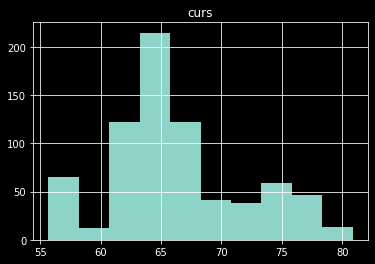

In [24]:
final_df.hist('curs')   # не работает в VS и PyCharm нужно прописывать по каждому
plt.show()

In [25]:
import seaborn as sns

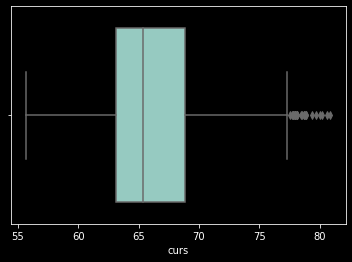

In [26]:
sns.boxplot(final_df['curs'])
plt.show()

In [27]:
X = final_df.drop('curs', axis=1)
y = final_df.curs

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [29]:
X_train.shape

(587, 45)

In [30]:
X_test.shape

(147, 45)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
LinReg = LinearRegression()

In [36]:
LinReg.fit(X_train, y_train)

LinearRegression()

In [37]:
LinReg_prediction = LinReg.predict(X_test)
LinReg_prediction

array([77.33726804, 56.28477752, 65.7208267 , 65.28236417, 66.537939  ,
       63.06760806, 58.17272397, 66.24888556, 73.68591584, 67.15832969,
       66.32365054, 68.98994479, 66.62515772, 75.73038247, 57.38784138,
       61.61671392, 57.150026  , 65.89557832, 64.34530475, 68.94343363,
       65.68579848, 64.33511286, 64.95967542, 56.87013786, 57.12458124,
       75.58120531, 60.85027963, 62.50626302, 64.99844275, 76.08607819,
       63.62598566, 63.88970898, 63.6357877 , 63.125155  , 63.29511719,
       61.94235505, 67.13297866, 66.48924528, 64.45297318, 58.25374072,
       62.23769345, 62.91549443, 63.1942793 , 75.10469988, 65.88634229,
       65.79595402, 67.42780282, 65.32645305, 61.72567029, 64.03997827,
       73.98001899, 66.3392238 , 65.26342867, 66.19130495, 66.10347984,
       77.001519  , 66.35742403, 65.36427761, 70.99482034, 65.78415067,
       75.72227754, 69.55196847, 62.03315497, 63.21819649, 74.04336506,
       67.19289251, 74.91870127, 63.85755349, 57.5892669 , 71.21

In [38]:
LinReg_mae = mean_absolute_error(y_test, LinReg_prediction)
print('LinReg_mae: ', LinReg_mae)

LinReg_mae:  0.4109743456921432


In [39]:
pd.DataFrame(data=LinReg.coef_, index=X.columns, columns=['value']).sort_values(by='value', ascending=False)

,value
day_lag_1,0.933368
usd_mean_week,0.297110
month_8,0.222451
year_2020,0.209053
oil_lag_7,0.147118
oil_lag_5,0.140274
weekday_4,0.134233
month_3,0.122180
day_lag_5,0.111066
weekday_1,0.105566


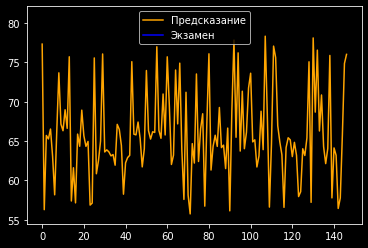

In [168]:
plt.plot(LinReg_prediction, label='Предсказание', color='orange')
plt.plot(y_test.iloc[0], label='Экзамен', color='blue')
plt.legend()
plt.show()

In [46]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [47]:
rr = Ridge()

In [48]:
rr.fit(X_train, y_train)

Ridge()

In [49]:
rr_prediction = rr.predict(X_test)
rr_prediction

array([77.38708028, 56.27827026, 65.73456061, 65.2784815 , 66.54192658,
       63.05726807, 58.17618819, 66.25028209, 73.67718281, 67.16449367,
       66.30659907, 68.98419333, 66.65828709, 75.7243111 , 57.37805269,
       61.62374115, 57.14925874, 65.90201514, 64.350147  , 68.93747175,
       65.69935832, 64.3420501 , 64.963923  , 56.8690923 , 57.1191809 ,
       75.56505464, 60.82098213, 62.49886043, 65.00547945, 76.08776343,
       63.62322964, 63.8916789 , 63.63750507, 63.11474679, 63.28659258,
       61.94522482, 67.12511168, 66.48142964, 64.45507337, 58.26786398,
       62.23789244, 62.916792  , 63.1964347 , 75.09565981, 65.89206629,
       65.78632724, 67.41860307, 65.32292183, 61.72487784, 64.04166056,
       73.96442424, 66.34104451, 65.27675384, 66.18978955, 66.11437291,
       77.01322982, 66.35409497, 65.3616054 , 70.99244616, 65.78660422,
       75.72726562, 69.54927104, 62.05334052, 63.20836677, 74.05625114,
       67.19804413, 74.92254749, 63.8526918 , 57.5764288 , 71.22

In [50]:
rr_mae = mean_absolute_error(y_test, rr_prediction)
print('rr_mae: ', rr_mae)

rr_mae:  0.4085465494683527


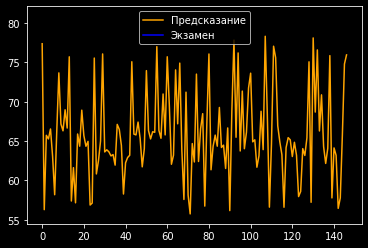

In [167]:
plt.plot(rr_prediction, label='Предсказание', color='orange')
plt.plot(y_test.iloc[0], label='Экзамен', color='blue')
plt.legend()
plt.show()

In [52]:
lr = Lasso()

In [53]:
lr.fit(X_train, y_train)

Lasso()

In [55]:
lr_prediction = lr.predict(X_test)
lr_prediction

array([77.74206601, 56.86541505, 65.92439788, 65.16484662, 66.09124638,
       62.76418695, 58.67523921, 66.02816128, 73.01653815, 66.94743193,
       66.28541311, 68.89232612, 66.99563425, 75.31319745, 57.56582754,
       61.95529547, 57.79154114, 66.12013685, 64.44567413, 68.8891209 ,
       65.36054338, 64.40438448, 65.1086647 , 57.26800924, 57.5893133 ,
       75.44384335, 61.47581735, 62.65342594, 65.02994876, 75.78470589,
       63.54140054, 64.12810207, 63.62980167, 63.21668973, 63.40381426,
       61.95625696, 66.89686488, 66.16502852, 64.47668192, 58.77890844,
       62.35201931, 63.11195961, 63.29769145, 74.78576162, 65.97051448,
       65.49800111, 67.14348754, 65.28716144, 61.85965927, 64.15248108,
       73.37026542, 66.3638553 , 65.5966242 , 65.98989497, 66.12751307,
       76.59715419, 66.31518217, 65.23601377, 70.67787026, 65.70699303,
       75.37899196, 69.3814315 , 62.31809788, 63.21858208, 74.14636728,
       67.05762503, 74.71249803, 63.97572224, 57.97570085, 71.11

In [56]:
lr_mae = mean_absolute_error(y_test, lr_prediction)
print('lr_mae: ', lr_mae)

lr_mae:  0.41279741002267817


In [704]:
pd.DataFrame(data=lr.coef_, index=X.columns, columns=['value']).sort_values(by='value', ascending=False)

,value
day_lag_1,0.947170
mult_3,0.001156
mult_7,0.000380
mult_5,0.000062
month_7,0.000000
year_2020,0.000000
month_1,-0.000000
month_2,-0.000000
month_3,0.000000
month_4,-0.000000


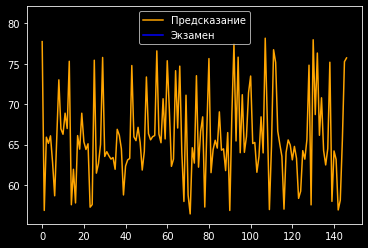

In [166]:
plt.plot(lr_prediction, label='Предсказание', color='orange')
plt.plot(y_test.iloc[0], label='Экзамен', color='blue')
plt.legend()
plt.show()

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf = RandomForestRegressor(random_state=42)

In [60]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [164]:
rf_prediction = rf.predict(X_test)
rf_prediction

array([78.999671, 56.528532, 65.844541, 65.776819, 66.322061, 62.640158,
       57.781967, 65.833946, 73.464316, 67.720426, 66.326168, 69.039263,
       67.377374, 75.470194, 56.908201, 58.815201, 57.319414, 66.320364,
       64.066939, 68.83115 , 65.584265, 64.49755 , 65.143864, 56.880152,
       57.125437, 75.536645, 61.569844, 62.693347, 65.276712, 76.687677,
       63.727699, 63.905727, 63.797692, 63.104209, 63.245191, 61.271444,
       66.793224, 66.548668, 64.521118, 58.231716, 62.053109, 62.968861,
       63.133315, 75.530695, 65.683339, 65.708577, 67.403127, 65.28937 ,
       61.614826, 64.278844, 73.768346, 66.478482, 65.41052 , 65.844898,
       65.787255, 76.959464, 66.490374, 65.568355, 71.143632, 65.759586,
       75.559022, 69.519292, 62.60253 , 63.100083, 73.664927, 66.96022 ,
       75.382041, 63.845438, 57.450772, 72.208992, 57.816768, 56.472966,
       64.621878, 62.656014, 73.889134, 62.071806, 66.415863, 68.872225,
       56.804316, 66.871686, 76.090485, 61.291593, 

In [62]:
rf_mae = mean_absolute_error(y_test, rf_preduction)
print('rf_mae: ', rf_mae)

rf_mae:  0.45004436054421865


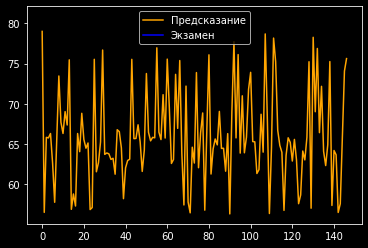

In [165]:
plt.plot(rf_prediction, label='Предсказание', color='orange')
plt.plot(y_test.iloc[0], label='Экзамен', color='blue')
plt.legend()
plt.show()

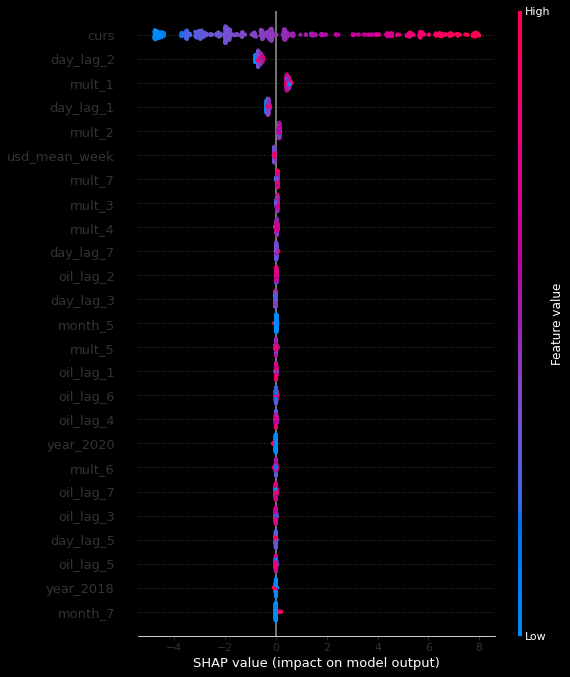

In [63]:
shap_test = shap.TreeExplainer(rf).shap_values(final_df)
shap.summary_plot(shap_test, final_df,
                      max_display=25, auto_size_plot=True)

In [64]:
from sklearn.neural_network import MLPRegressor

In [65]:
mlp = MLPRegressor(max_iter=1000, random_state=42, hidden_layer_sizes=(250, 250, 250), activation='relu', solver='adam', alpha=0.00005,batch_size='auto', learning_rate='adaptive', learning_rate_init=0.0001)

In [66]:
mlp.fit(X_train, y_train)

MLPRegressor(alpha=5e-05, hidden_layer_sizes=(250, 250, 250),
             learning_rate='adaptive', learning_rate_init=0.0001, max_iter=1000,
             random_state=42)

In [67]:
mlp_prediction = mlp.predict(X_test)
mlp_prediction

array([73.62915182, 54.49293672, 65.57233476, 65.88634726, 67.48046374,
       63.14591278, 55.95943466, 66.89554725, 72.89384562, 66.93680984,
       64.36643583, 66.42307808, 66.73533542, 76.70864516, 56.42100884,
       61.55603274, 56.74883915, 64.77255059, 63.64006298, 67.81524366,
       66.06280601, 64.54248515, 64.71537379, 55.49994761, 55.85529076,
       72.3986972 , 63.63528457, 62.6623452 , 65.00280014, 76.97848905,
       62.6017433 , 63.60348563, 63.4519847 , 62.60579331, 63.6999503 ,
       61.61944979, 66.28248844, 66.39312284, 64.35487708, 57.69527029,
       60.84436962, 62.58196936, 61.726179  , 74.36935815, 65.35685856,
       65.69228117, 67.56258328, 64.54770808, 60.69030886, 63.81329037,
       73.39192246, 65.1811919 , 64.51077547, 64.7725864 , 67.00894967,
       76.32653681, 65.54802143, 65.12018413, 70.63148282, 65.26469747,
       75.19811641, 68.98727084, 62.33334317, 62.25564695, 73.13997288,
       66.12195349, 73.69385566, 63.35156556, 56.45752659, 69.96

In [68]:
mlp_mae = mean_absolute_error(y_test, mlp_prediction)
print('mlp_mae: ', mlp_mae)

mlp_mae:  1.1032649247391817


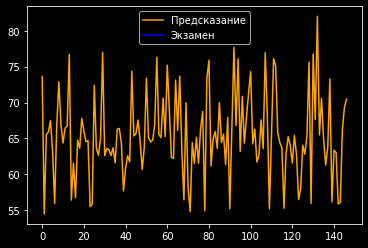

In [160]:
plt.plot(mlp_prediction, label='Предсказание', color='orange')
plt.plot(y_test.iloc[0], label='Экзамен', color='blue')
plt.legend()
plt.show()

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
dtr = DecisionTreeRegressor(max_depth=5, max_features=15, random_state=42, criterion='mse', splitter='best', min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0)

In [74]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features=15, min_samples_split=3,
                      random_state=42)

In [75]:
dtr_prediction = dtr.predict(X_test)
dtr_prediction

array([78.4468    , 56.50035417, 66.0000619 , 66.0000619 , 66.0000619 ,
       62.88102615, 57.31024762, 66.0000619 , 74.26880909, 68.161468  ,
       66.0000619 , 69.29138571, 68.161468  , 75.91618889, 57.31024762,
       61.4311    , 57.31024762, 66.0000619 , 63.83089877, 68.161468  ,
       66.0000619 , 65.29804528, 65.29804528, 57.31024762, 57.31024762,
       75.91618889, 61.99323659, 62.88102615, 65.29804528, 75.91618889,
       63.83089877, 63.83089877, 63.83089877, 63.83089877, 63.83089877,
       61.99323659, 67.32587222, 66.0000619 , 64.87227692, 58.60095   ,
       61.99323659, 62.88102615, 62.88102615, 75.91618889, 65.29804528,
       66.0000619 , 67.32587222, 65.29804528, 61.99323659, 63.83089877,
       74.26880909, 66.0000619 , 65.29804528, 65.29804528, 66.0000619 ,
       76.65519286, 66.0000619 , 65.29804528, 70.99778235, 66.0000619 ,
       75.91618889, 69.29138571, 62.88102615, 62.88102615, 73.53467333,
       67.32587222, 75.91618889, 63.83089877, 57.31024762, 70.99

In [76]:
dtr_mae = mean_absolute_error(y_test, dtr_prediction)
print('dtr_mae: ', dtr_mae)

dtr_mae:  0.6212918130757709


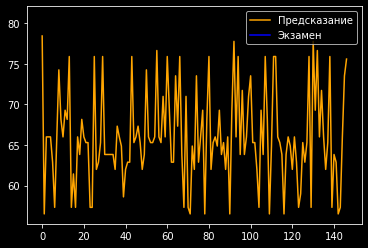

In [159]:
plt.plot(dtr_prediction, label='Предсказание', color='orange')
plt.plot(y_test.iloc[0], label='Экзамен', color='blue')
plt.legend()
plt.show()

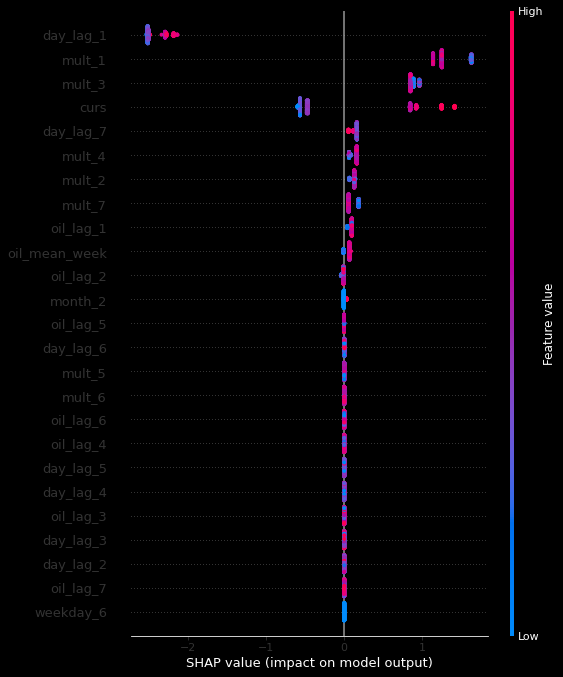

In [77]:
shap_test = shap.TreeExplainer(dtr).shap_values(final_df)
shap.summary_plot(shap_test, final_df,
                      max_display=25, auto_size_plot=True)

In [78]:
from sklearn.linear_model import ElasticNetCV

In [79]:
elastic = ElasticNetCV(random_state=42, l1_ratio=1, eps=0.001, n_alphas=50, alphas=None, fit_intercept=True, normalize=False, precompute='auto', max_iter=1000, tol=0.0001, cv=3, copy_X=True, verbose=0, n_jobs=-1, positive=False, selection='cyclic')

In [80]:
elastic.fit(X_train, y_train)

ElasticNetCV(cv=3, l1_ratio=1, n_alphas=50, n_jobs=-1, random_state=42)

In [81]:
elastic_prediction = elastic.predict(X_test)
elastic_prediction

array([77.37233145, 57.63494137, 65.90641342, 64.80828249, 65.69184416,
       62.82450712, 59.36798968, 65.77964322, 72.63863171, 66.59313473,
       66.21132807, 69.07182638, 66.9813302 , 74.72033097, 58.26000407,
       62.3086669 , 58.44751249, 65.98473734, 64.63072009, 68.76350257,
       64.97799586, 64.33980132, 65.22298689, 57.99284437, 58.3593151 ,
       74.94078332, 61.69752204, 62.86615238, 64.9350667 , 75.21763634,
       63.55235512, 64.34154907, 63.94540301, 63.23642703, 63.6266951 ,
       62.20858234, 66.77978336, 66.1926783 , 64.41294578, 59.41802255,
       62.48582045, 63.28041175, 63.65096151, 74.31037136, 66.10334781,
       65.16783293, 67.19972183, 65.17323945, 62.17367641, 64.10761317,
       72.94166557, 66.33287949, 65.5711487 , 65.86073464, 65.95065465,
       75.93384383, 66.30585078, 64.90370445, 70.56281   , 65.62026867,
       74.84779423, 69.43957949, 62.44284884, 63.42724658, 74.09059355,
       66.92971204, 74.30071772, 64.17568724, 58.70441279, 70.97

In [82]:
elastic_mae = mean_absolute_error(y_test, elastic_prediction)
print('elastic_mae: ', elastic_mae)

elastic_mae:  0.5857226938262997


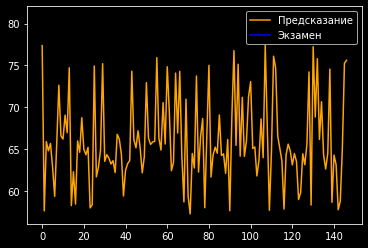

In [736]:
plt.plot(elastic_prediction, label='Предсказание', color='orange')
plt.plot(y_test.iloc[0], label='Экзамен', color='blue')
plt.legend()
plt.show()

In [84]:
from sklearn.ensemble import AdaBoostRegressor

In [85]:
ada = AdaBoostRegressor(base_estimator=None, n_estimators=30, learning_rate=0.5, loss='linear', random_state=42)

In [86]:
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=30, random_state=42)

In [87]:
ada_prediction = ada.predict(X_test)
ada_prediction

array([78.62839535, 57.31960312, 65.62545548, 65.4281978 , 66.58298323,
       62.30789216, 57.36744583, 65.62545548, 73.1598    , 67.75073718,
       66.58298323, 69.64811613, 67.47834157, 75.74986273, 57.31960312,
       57.57738125, 57.31960312, 66.58298323, 64.57860822, 67.76781429,
       65.17029382, 64.6963709 , 64.78958636, 57.31960312, 57.31960312,
       75.72394824, 62.26911648, 62.30789216, 65.17029382, 76.1053931 ,
       63.98808934, 64.57860822, 64.57860822, 62.99600444, 63.74600637,
       62.12823898, 67.29043443, 66.58298323, 64.6963709 , 57.38585789,
       62.26911648, 62.99600444, 62.99600444, 75.48424146, 65.515835  ,
       65.62545548, 67.29043443, 65.17029382, 62.26911648, 64.57860822,
       73.1598    , 66.58298323, 65.2040788 , 65.62545548, 65.62545548,
       76.82746207, 66.58298323, 65.17029382, 71.05889   , 65.62545548,
       75.64567959, 69.64811613, 62.30789216, 62.99600444, 73.07441486,
       67.29043443, 75.48424146, 64.57860822, 57.36744583, 72.48

In [88]:
ada_mae = mean_absolute_error(y_test, ada_prediction)
print('dtr_mae: ', ada_mae)

dtr_mae:  0.6259034250608586


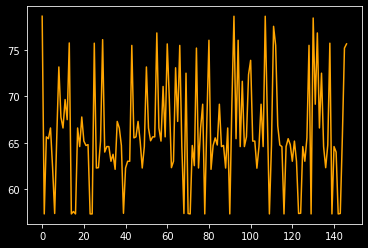

In [755]:
plt.plot(ada_prediction, label='Предсказание', color='orange')
plt.plot(y_test.iloc[0], label='Экзамен', color='blue')
plt.legend()
plt.show()

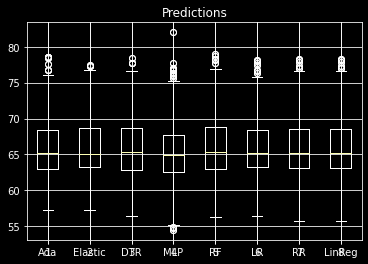

In [105]:
data = [ada_prediction, elastic_prediction, dtr_prediction, mlp_prediction, rf_preduction, lr_prediction, rr_prediction, LinReg_prediction]
fig7, ax7 = plt.subplots()
ax7.set_title('Predictions')
ax7.boxplot(data, labels=['Ada', 'Elastic', 'DTR', 'MLP', 'RF', 'LR', 'RR', 'LinReg'])
plt.grid()
ax7.boxplot(data)
plt.show()

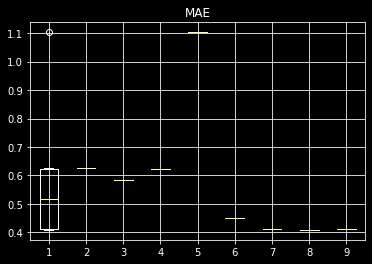

In [156]:
data = [data, ada_mae, elastic_mae, dtr_mae, mlp_mae, rf_mae, lr_mae, rr_mae, LinReg_mae]
fig7, ax7 = plt.subplots()
ax7.set_title('MAE')
plt.grid()
#ax7.boxplot(data, labels=['All','A', 'El', 'DTR', 'MLP', 'RF', 'LR', 'RR', 'L'])
ax7.boxplot(data)
plt.show()

In [158]:
print('MAE')
print('9. LinearRegression: ', LinReg_mae)
print('8. Ridge: ', rr_mae)
print('7. Lasso: ', lr_mae)
print('6. RandomForestRegressor: ', rf_mae)
print('5. MLPRegression: ', mlp_mae)
print('4. DecisionTreeRegressor: ', dtr_mae)
print('3. ElasticNetCV: ', elastic_mae)
print('2. AdaBoostRegressor: ', ada_mae)
print('1. Data')

MAE
9. LinearRegression:  0.4109743456921432
8. Ridge:  0.4085465494683527
7. Lasso:  0.41279741002267817
6. RandomForestRegressor:  0.45004436054421865
5. MLPRegression:  1.1032649247391817
4. DecisionTreeRegressor:  0.6212918130757709
3. ElasticNetCV:  0.5857226938262997
2. AdaBoostRegressor:  0.6259034250608586
1. Data
